### Import Modules and Python Functions

In [2]:
import os
import numpy as np
import pandas as pd
import yaml
with open('../python/variables.yaml') as info:
    VARS = yaml.load(info, Loader=yaml.FullLoader)

# visualization modules
import seaborn as sns; sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from random import randint
from pylab import rcParams

### Import Variables

In [3]:
# Events
events_csv = VARS['EVENTS_CSV']
events_cols_all = VARS['EVENTS_COLS_ALL']
events_cols_select = VARS['EVENTS_COLS_SELECT']

# Mentions
mentions_csv = VARS['MENTIONS_CSV']
mentions_cols_all = VARS['MENTIONS_COLS_ALL']
mentions_cols_select = VARS['MENTIONS_COLS_SELECT']

# Pilot
cameo_verbs = VARS['CAMEO_VERBS']
cameo_quadclass = VARS['CAMEO_QUADCLASS']
select_countries_60 = VARS['PILOT_COUNTRIES_IOS2']

### Define Reusable Python Functions

In [4]:
def get_var_percentages(df: pd, target_col: str, sort=False) -> pd:
    """Get Percentage of Column Values in Target Column of Cleaned GDELT Data
    :param df: dataframe of cleaned data
    :param target_col: column name of variable of interest
    :rtype: dataframe
    :return: dataframe
    """

    # Create a sub-dataframe to group GLOBALEVENTID by Target Column
    grouped_df = df[['GLOBALEVENTID', target_col]].groupby(target_col).count()
    
    # Get variable percentage                                                                
    grouped_df['%'] = (grouped_df['GLOBALEVENTID'] / grouped_df['GLOBALEVENTID'].sum()) * 100
    
    if sort==True:
        grouped_df = grouped_df.sort_values(by='%', ascending=False).reset_index()
    
    return grouped_df

In [20]:
def plot_piechart(df: pd, target_cols: str, pie_title: str, save_png: str) -> pd:
    """ Create colorful pie chart showing percent of events by variable label
    :param df: dataframe created via the get_var_percentages() function
    :param target_cols: target column in the get_var_percentages() function
    :param pie_title: target column string for pie chart title
    :param save_png: string based on the target column for storing png
    """
    # Create color list for pie chart visualization
    labels = df[target_cols]
    colors = []
    for i in range(len(labels)):
        colors.append('#%06X' % randint(0, 0xFFFFFF))
    
    if len(np.unique(labels)) > 8:
        rcParams['figure.figsize'] = 30,30
    else:
        rcParams['figure.figsize'] = 8,8

    # Plot
    plt.pie(df['%'], colors=colors, labels=labels, autopct='%1.1f%%')
    plt.title('Percentage of Events by '+ pie_title)
    plt.savefig('../images/conflict_' + save_png + '.png', dpi=300)
    plt.show()

### Import Data

In [6]:
# Store dataframe globally
%store -r cleaned_merged_df
print(cleaned_merged_df.shape)
cleaned_merged_df.head()

(1267, 19)


,GLOBALEVENTID,SQLDATE,EventCode,EventRootCode,QuadClass,GoldsteinScale,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_Lat,ActionGeo_Long,SOURCEURL,EventTimeDate,MentionTimeDate,Confidence,MentionDocTone,DaysBetween,EventRootCodeString,QuadClassString
0,972238884,20200301,20,2,1,3.0,4,"Canberra, Australian Capital Territory, Australia",AS,-35.2833,149.2170,https://www.aninews.in/news/world/asia/china-a...,2021-03-01 20:45:00,2021-03-01 20:45:00,20.0,-6.529210,0.0,APPEAL,Verbal Cooperation
1,972238885,20200301,20,2,1,3.0,4,"Beijing, Beijing, China",CH,39.9289,116.3880,https://www.aninews.in/news/world/asia/china-a...,2021-03-01 20:45:00,2021-03-01 20:45:00,20.0,-6.529210,0.0,APPEAL,Verbal Cooperation
2,972238886,20200301,20,2,1,3.0,4,"Beijing, Beijing, China",CH,39.9289,116.3880,https://www.aninews.in/news/world/asia/china-a...,2021-03-01 20:45:00,2021-03-01 20:45:00,60.0,-6.529210,0.0,APPEAL,Verbal Cooperation
3,972238887,20200301,111,11,3,-2.0,4,"Mumbai, Maharashtra, India",IN,18.9750,72.8258,https://www.techshout.com/security/2021/01/chi...,2021-03-01 20:45:00,2021-03-01 20:45:00,40.0,-4.385965,0.0,DISAPPROVE,Verbal Conflict
4,972238888,20200301,110,11,3,-2.0,4,"Mumbai, Maharashtra, India",IN,18.9750,72.8258,https://www.techshout.com/security/2021/01/chi...,2021-03-01 20:45:00,2021-03-01 20:45:00,40.0,-4.385965,0.0,DISAPPROVE,Verbal Conflict


### Select Conflict Data (QuadClass=[3,4])

In [8]:
conflict_df = cleaned_merged_df.loc[ cleaned_merged_df['QuadClass'].isin([3,4]) ].reset_index(drop=True)
print(conflict_df.shape)
conflict_df.head()

(326, 19)


,GLOBALEVENTID,SQLDATE,EventCode,EventRootCode,QuadClass,GoldsteinScale,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_Lat,ActionGeo_Long,SOURCEURL,EventTimeDate,MentionTimeDate,Confidence,MentionDocTone,DaysBetween,EventRootCodeString,QuadClassString
0,972238887,20200301,111,11,3,-2.0,4,"Mumbai, Maharashtra, India",IN,18.9750,72.8258,https://www.techshout.com/security/2021/01/chi...,2021-03-01 20:45:00,2021-03-01 20:45:00,40.0,-4.385965,0.0,DISAPPROVE,Verbal Conflict
1,972238888,20200301,110,11,3,-2.0,4,"Mumbai, Maharashtra, India",IN,18.9750,72.8258,https://www.techshout.com/security/2021/01/chi...,2021-03-01 20:45:00,2021-03-01 20:45:00,40.0,-4.385965,0.0,DISAPPROVE,Verbal Conflict
2,972238889,20200301,190,19,4,-10.0,5,"Katsina State, Katsina, Nigeria",NI,12.2500,7.5000,https://www1.cbn.com/cbnnews/cwn/2021/march/bo...,2021-03-01 20:45:00,2021-03-01 20:45:00,100.0,-5.102041,0.0,FIGHT,Material Conflict
3,972238890,20200301,110,11,3,-2.0,4,"Manila, Manila, Philippines",RP,14.6042,120.9820,https://www.manilatimes.net/2021/03/02/opinion...,2021-03-01 20:45:00,2021-03-01 20:45:00,40.0,-2.529183,0.0,DISAPPROVE,Verbal Conflict
4,972238891,20200301,120,12,3,-4.0,4,"Visakhapatnam, Andhra Pradesh, India",IN,17.7000,83.3000,https://www.thehindu.com/news/national/andhra-...,2021-03-01 20:45:00,2021-03-01 20:45:00,100.0,-4.090909,0.0,REJECT,Verbal Conflict


## Assess Metrics by Country

#### By Country

/Users/emily-work/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


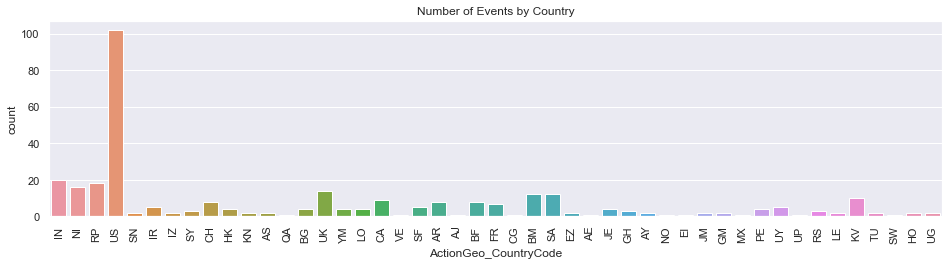

In [9]:
# Create a bar graph to show distribution of incidences of maternal death by region
fig, ax = plt.subplots(figsize=(16, 4))
plt.xticks(rotation='vertical')
plt.grid(True)
fig.subplots_adjust(bottom=0.2)
sns.countplot(conflict_df['ActionGeo_CountryCode'])
plt.title('Number of Events by Country')
plt.show()

Observations: While this needs to be assessed with more data, it appears that the US has substantially more records when compared to all other countries within this dataset. This exploration is briefly placed on hold until after the meeting with the Data Engineers to establish the most efficient pipeline to import GDELT's data (02 March 2021)

### Question 2: What is the Percentage of Events per QuadClass? What is the MODE Confidence and Tone per QuadClass?

#### Percentage of Events by QuadClass

In [10]:
# Create a sub-dataframe to group GLOBALEVENTID by QuadClass
quadclass = get_var_percentages(conflict_df, 'QuadClassString', sort=True)
quadclass

,QuadClassString,GLOBALEVENTID,%
0,Material Conflict,171,52.453988
1,Verbal Conflict,155,47.546012


#### Visualize

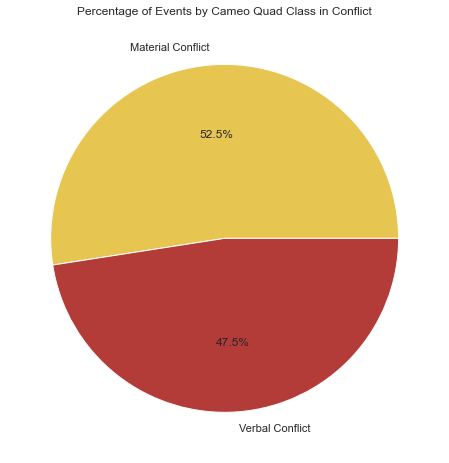

In [13]:
plot_piechart(quadclass, 'QuadClassString', 'Cameo Quad Class in Conflict', 'cameo_quadclass_percentages')

Observations: While this needs to be assessed with more data, it does appear that QuadClass 1, meaning Verbal Cooperation, is the most prevelant, followed by QuadClass 4, Material Cooperation. However, is based on the previous section, it would be worthwhile to remove US-associated events and re-assess. This exploration is briefly placed on hold until after the meeting with the Data Engineers to establish the most efficient pipeline to import GDELT's data (02 March 2021)

In [14]:
# Create a sub-dataframe to group GLOBALEVENTID by QuadClass without US 
non_us_df = conflict_df.loc[ conflict_df['ActionGeo_CountryCode'] != 'US' ]
non_us_quadclass = get_var_percentages(non_us_df, 'QuadClass')
non_us_quadclass

,GLOBALEVENTID,%
QuadClass,,
3,96,42.857143
4,128,57.142857


Observations: The propotions seemed to have remained roughly the same with a slight increase in QuadClass 1 and 4 and slight decreases in QuadClass 2 and 3. This exploration is briefly placed on hold until after the meeting with the Data Engineers to establish the most efficient pipeline to import GDELT's data (02 March 2021)

#### By Country

#### Mode of Confidence and MentionDocTone Values by QuadClass

In [15]:
# Create a sub-dataframe to group GLOBALEVENTID by QuadClass
quadclass_modes = conflict_df[['QuadClass','Confidence','MentionDocTone']
                                   ].groupby('QuadClass').agg(lambda x: pd.Series.mode(x)[0])
quadclass_modes

,Confidence,MentionDocTone
QuadClass,,
3,40.0,-2.465166
4,20.0,-5.102041


Observations: The propotions seemed to have remained roughly the same with a slight increase in QuadClass 1 and 4 and slight decreases in QuadClass 2 and 3. This exploration is briefly placed on hold until after the meeting with the Data Engineers to establish the most efficient pipeline to import GDELT's data (02 March 2021)

### Question 2: What is the Percentage of Events per EventRootCode? What is the MODE Confidence and Tone per EventRootCode?

In [16]:
# Create a sub-dataframe to group GLOBALEVENTID by EventRootCode
cameoaction = get_var_percentages(conflict_df, 'EventRootCodeString', sort=True)
cameoaction

,EventRootCodeString,GLOBALEVENTID,%
0,FIGHT,72,22.085890
1,DISAPPROVE,67,20.552147
2,COERCE,55,16.871166
3,REJECT,48,14.723926
4,REDUCE RELATIONS,26,7.975460
5,ASSAULT,17,5.214724
6,THREATEN,16,4.907975
7,DEMAND,15,4.601227
8,PROTEST,9,2.760736
9,EXHIBIT MILITARY POSTURE,1,0.306748


#### Visualize

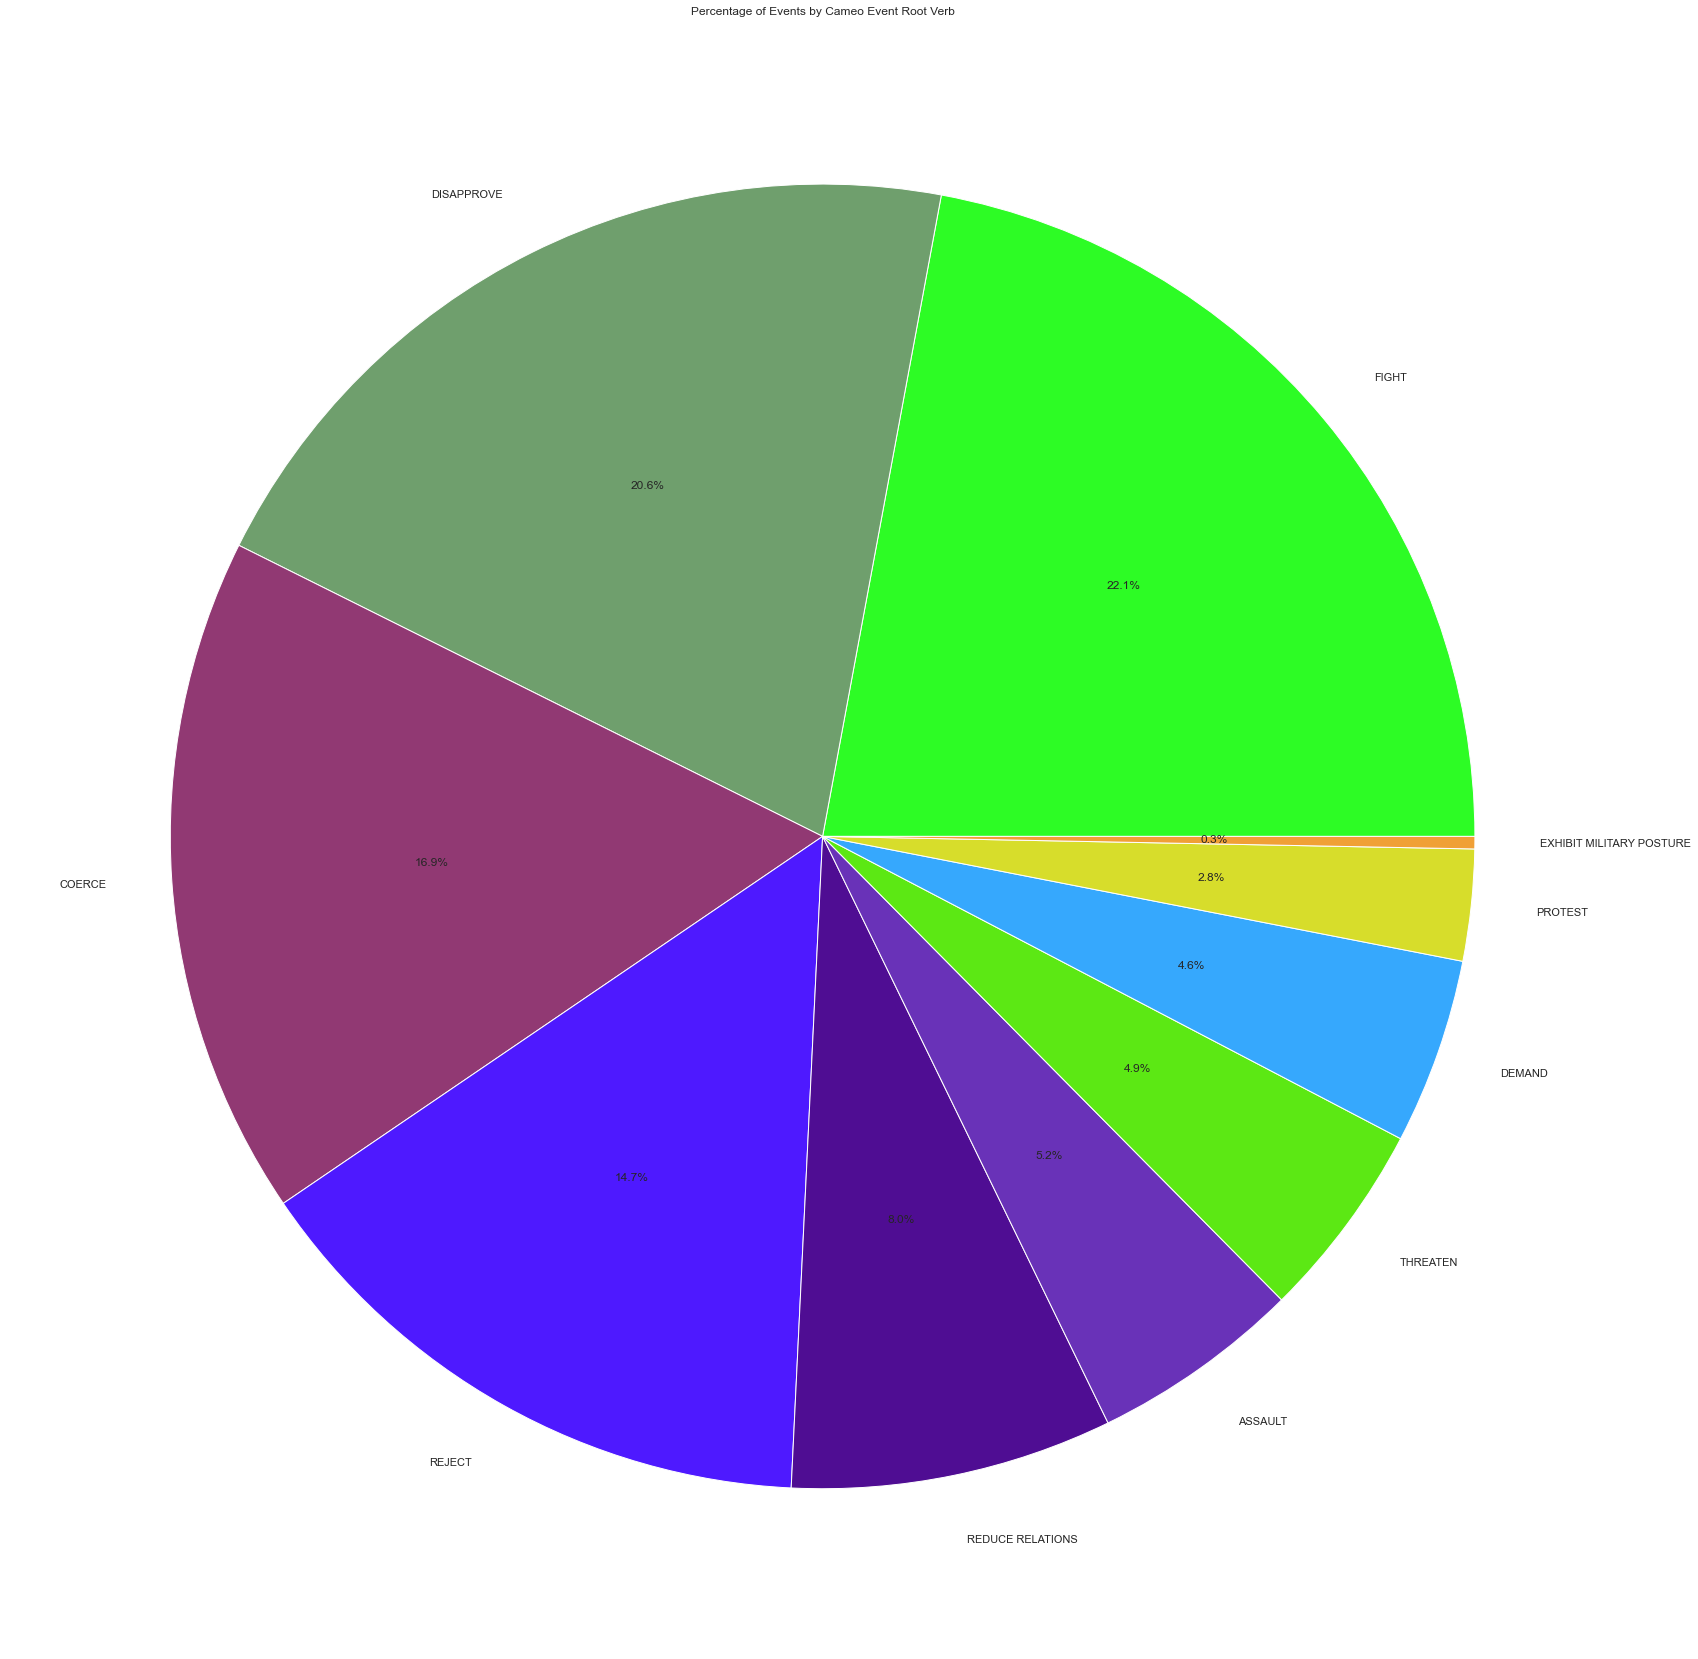

In [21]:
plot_piechart(cameoaction, 'EventRootCodeString', 'Cameo Event Root Verb', 'cameo_verb_percentages')

Observations: This exploration is briefly placed on hold until after the meeting with the Data Engineers to establish the most efficient pipeline to import GDELT's data (02 March 2021)

### Question 3: What is the Count of EventRootCodes by QuadClass? (ie. does is match the documentation?)

In [22]:
quadclass_events = conflict_df[['GLOBALEVENTID','QuadClass','QuadClassString','EventRootCodeString']].groupby(['QuadClass','QuadClassString','EventRootCodeString']).count()
print(quadclass_events.shape)
quadclass_events

(10, 1)


GLOBALEVENTID
QuadClass QuadClassString   EventRootCodeString                    
3         Verbal Conflict   DEMAND                               15
                            DISAPPROVE                           67
                            PROTEST                               9
                            REJECT                               48
                            THREATEN                             16
4         Material Conflict ASSAULT                              17
                            COERCE                               55
                            EXHIBIT MILITARY POSTURE              1
                            FIGHT                                72
                            REDUCE RELATIONS                     26